In [1]:
%load_ext autoreload
%autoreload 2

This notebook seeks to understand what errors occur when adding helium.


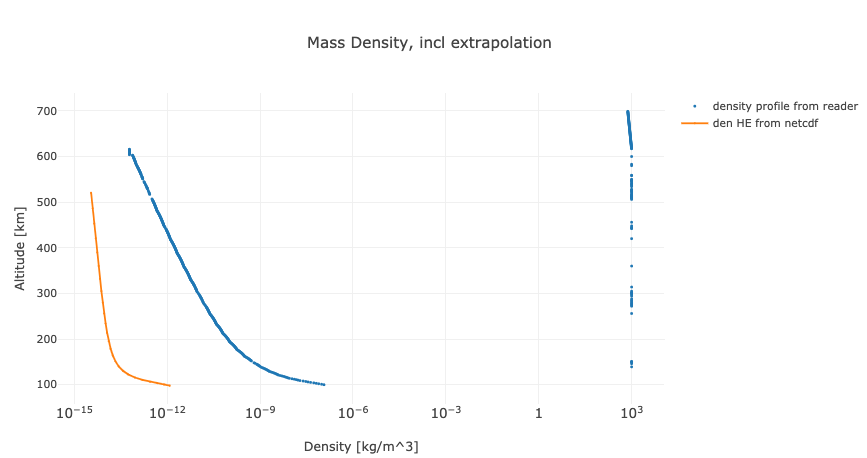

In [2]:
import pandas as pd
import numpy as np

from netCDF4 import Dataset
from plotly.offline import plot, iplot
import plotly.graph_objs as go
from plotly.graph_objs import Layout
import plotly
plotly.offline.init_notebook_mode(connected=True)


import matplotlib.pyplot as plt
import antlr4 
from scipy.spatial import kdtree
from scipy.interpolate import griddata, LinearNDInterpolator
import scipy



In [3]:
from tiegcm.tiegcm import TIEGCM, Point3D, Point4D, Slice_key4D, ColumnSlice4D, ColumnSlice3D
from tiegcm.util import average_longitude
from tiegcm.util import *


from tiegcm.tiegcm_original import TIEGCM as TIEGCM_original
from tiegcm.tiegcm_original import Point3D as Point3D_original
from tiegcm.tiegcm_original import Point4D as Point4D_original
from tiegcm.tiegcm_original import Point4D as Point4D_original
from tiegcm.tiegcm_original import Slice_key4D as Slice_key4D_original
from tiegcm.tiegcm_original import ColumnSlice4D as ColumnSlice4D_original
from tiegcm.tiegcm_original import ColumnSlice3D as ColumnSlice3D_original
from tiegcm.util_original import average_longitude as average_longitude_original


from tiegcm.util_original import *

In [4]:
filename = '../data/TIEGCM_CCMC/my_stuff/s_002.nc'

In [5]:
def test_mass_density():
    tiegcm = TIEGCM(filename) 
    tiegcm_original = TIEGCM_original(filename)
    xlat = -37.5
    xlon = 100
    xalt = np.arange(100,700,1)*1e5 # cm
    time = 12 # ut hours
    vert_dens_profile = []
    vert_dens_profile_o = []

    for ixalt in xalt:
        test_dens = (tiegcm.density(xlat, xlon, ixalt, time))
        test_dens_o = (tiegcm_original.density(xlat, xlon, ixalt, time))
        
        vert_dens_profile.append(test_dens)
        vert_dens_profile_o.append(test_dens_o)
   
        trace_denCode = go.Scatter(
            x = 1e3*np.array(vert_dens_profile),
            y = 1e-5*xalt,
            name='density profile from reader',mode = 'markers',marker= dict(size =3) )
        
        trace_denCode_o = go.Scatter(
            x = 1e3*np.array(vert_dens_profile_o),
            y = 1e-5*xalt,
            name='density profile from original reader',mode = 'markers',marker= dict(size =3) )
        
        data = [trace_denCode,trace_denCode_o]

        layout = go.Layout(
            xaxis=dict(type='log', autorange=True, exponentformat='power',
                       showexponent='all',title = 'Density [kg/m^3]'    ),
            yaxis=dict(title = 'Altitude [km]'), title = "Mass Density, incl extrapolation")
    
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = 'latex')

    return test_dens 

In [6]:
test_mass_density()

initializing tiegcm with ../data/TIEGCM_CCMC/my_stuff/s_002.nc
initializing tiegcm with ../data/TIEGCM_CCMC/my_stuff/s_002.nc


tiegcm/tiegcm.py:199: UserWarning:

cannot be safely cast to variable data type

tiegcm/tiegcm_original.py:199: UserWarning:

cannot be safely cast to variable data type



3.932866475317087e-17

In [7]:
# tiegcm = TIEGCM_original(filename)
# helium_check = np.array(tiegcm.rootgrp.variables['HE'])


s_003 = Dataset(filename)
s_003.set_auto_maskandscale(False)


helium_missing = np.array(s_003.variables['TN'])
print helium_missing

helium_missing[helium_missing==1e36]=np.nan


HE_nan = np.isnan(helium_missing)
print HE_nan

He_findnan = HE_nan[HE_nan == True]
print He_findnan



[[[[1.7213164e+02 1.7213383e+02 1.7213495e+02 ... 1.7211882e+02
    1.7212411e+02 1.7212840e+02]
   [1.7223613e+02 1.7224187e+02 1.7224205e+02 ... 1.7218643e+02
    1.7220821e+02 1.7222485e+02]
   [1.7230817e+02 1.7229921e+02 1.7227713e+02 ... 1.7224513e+02
    1.7228157e+02 1.7230255e+02]
   ...
   [1.6776303e+02 1.6786984e+02 1.6798172e+02 ... 1.6749757e+02
    1.6757474e+02 1.6766389e+02]
   [1.6789943e+02 1.6798468e+02 1.6807343e+02 ... 1.6768242e+02
    1.6774664e+02 1.6781950e+02]
   [1.6813904e+02 1.6814836e+02 1.6815837e+02 ... 1.6811588e+02
    1.6812273e+02 1.6813048e+02]]

  [[1.7350400e+02 1.7353108e+02 1.7355708e+02 ... 1.7341833e+02
    1.7344740e+02 1.7347604e+02]
   [1.7343752e+02 1.7354153e+02 1.7362729e+02 ... 1.7303207e+02
    1.7318071e+02 1.7331662e+02]
   [1.7350362e+02 1.7358766e+02 1.7362152e+02 ... 1.7292671e+02
    1.7317268e+02 1.7336562e+02]
   ...
   [1.5903586e+02 1.5924077e+02 1.5945712e+02 ... 1.5853358e+02
    1.5867857e+02 1.5884711e+02]
   [1.5984610e

In [8]:
# user_lat = 10
# user_lon = -16
# user_ut = 12
# user_lev = 25

# DEN = 1e3*np.array(tiegcm.rootgrp.variables['DEN'])
# HE_mmr = np.array(tiegcm.rootgrp.variables['HE'])
# Helium = DEN*HE_mmr

# print (Helium[user_ut, :, user_lat, user_lon])
# #print (helium_check[user_ut, :, user_lat, user_lon])

In [9]:
# HE_mmr[HE_mmr==1e+36]=np.nan


# HE_nan = np.isnan(HE_mmr)
# print HE_nan

# # He_findnan = HE_nan[HE_nan == True]
# # print He_findnan

In [10]:
# tiegcm.rootgrp.variables['HE']